## Regression test

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data_for_reg1 = pd.read_excel("minus_factors_new.xlsx", index_col= 0)
data_for_reg2 = pd.read_excel("factors.xlsx",index_col= 0)
data_for_reg1.columns = ['NewFactor']
data_for_control = pd.read_excel("Re_t_new_merge.xlsx",index_col= 0)

In [3]:
data_for_control['남성_pop'] = data_for_control['남성_pop']/data_for_control['total_pop']

In [4]:
controal_va = data_for_control[['남성_pop', '2022_투표율', '야당비율_2022', '50_pop']]

In [5]:
np.isinf(data_for_control[['남성_pop', '2022_투표율','야당비율_2022','50_pop']]).sum()

남성_pop       0
2022_투표율     0
야당비율_2022    0
50_pop       0
dtype: int64

In [6]:
total_for_reg = pd.merge(controal_va, pd.merge(data_for_reg1, data_for_reg2, left_index=True, right_index=True),left_index=True, right_index=True)
total_for_reg.head()

,남성_pop,2022_투표율,야당비율_2022,50_pop,NewFactor,factor1,factor2,factor3,factor4
가평군,0.512024,0.764357,0.603225,0.566721,0.556088,1.570255,0.714038,-1.182049,1.287469
강릉시,0.500203,0.762683,0.612755,0.480245,-0.270361,-0.313803,-0.484991,0.204273,0.496674
강진군,0.485489,0.824524,0.146723,0.643763,1.510306,0.460763,0.087739,1.625572,1.066558
거제시,0.531861,0.749616,0.553038,0.360444,-0.579075,-0.887245,0.298740,-1.447908,1.792103
거창군,0.495138,0.780392,0.707828,0.567560,0.701705,-0.578207,0.492551,0.663532,0.408516


In [7]:
total_for_reg = total_for_reg.rename(columns={'2022_투표율' : 'voterate2022', '남성_pop' :'manpopulation', '야당비율_2022' : 'outerpartyratio','50_pop' : 'over50population'})

In [8]:
total_for_reg = total_for_reg[total_for_reg['voterate2022']!=0]

In [9]:
pd.DataFrame(np.corrcoef(total_for_reg.T), index= total_for_reg.columns, columns=total_for_reg.columns)

,manpopulation,voterate2022,outerpartyratio,over50population,NewFactor,factor1,factor2,factor3,factor4
manpopulation,1.000000,-0.216940,0.027960,0.009800,0.210688,0.305103,0.083462,-0.361994,0.105317
voterate2022,-0.216940,1.000000,-0.357668,0.383407,0.444518,0.385499,0.098332,0.284259,-0.018168
outerpartyratio,0.027960,-0.357668,1.000000,0.037183,-0.100403,-0.025505,0.079262,0.015480,-0.038334
over50population,0.009800,0.383407,0.037183,1.000000,0.910463,0.584560,0.342941,0.583062,0.271203
NewFactor,0.210688,0.444518,-0.100403,0.910463,1.000000,0.777809,0.275286,0.368925,0.271180
factor1,0.305103,0.385499,-0.025505,0.584560,0.777809,1.000000,0.006001,0.003743,0.015904
factor2,0.083462,0.098332,0.079262,0.342941,0.275286,0.006001,1.000000,0.006241,0.027177
factor3,-0.361994,0.284259,0.015480,0.583062,0.368925,0.003743,0.006241,1.000000,0.020454
factor4,0.105317,-0.018168,-0.038334,0.271203,0.271180,0.015904,0.027177,0.020454,1.000000


In [10]:
total_for_reg[total_for_reg['voterate2022']>total_for_reg['voterate2022'].quantile(0.95)]

,manpopulation,voterate2022,outerpartyratio,over50population,NewFactor,factor1,factor2,factor3,factor4
과천시,0.493063,0.848890,0.607634,0.401510,-0.923740,-0.838301,2.090343,0.189001,-1.843089
구례군,0.481035,0.840228,0.148848,0.660454,1.476348,0.260288,0.491005,0.810258,0.353661
군위군,0.513460,0.837266,0.861033,0.738519,1.976585,2.223835,0.439393,1.153754,-0.792273
담양군,0.495753,0.830543,0.124221,0.615753,0.941064,0.338242,0.416990,0.363701,0.507277
순창군,0.483970,0.833606,0.137502,0.629388,1.606470,0.237626,0.251562,0.568852,0.552671
신안군,0.532324,0.830505,0.116487,0.693505,2.716966,3.367897,-0.056316,2.026799,-2.400013
영양군,0.493765,0.826212,0.766003,0.692021,1.984396,1.605050,0.493138,1.129428,-0.638433
의성군,0.485184,0.828495,0.834419,0.728639,1.736672,1.187960,0.165248,2.113776,0.058947
임실군,0.503060,0.829281,0.148390,0.644773,1.849495,1.526692,0.225261,0.673251,0.186012
장수군,0.495254,0.837850,0.156363,0.640270,1.950512,2.229313,0.651105,-0.605433,-1.117090


array([[<AxesSubplot:title={'center':'manpopulation'}>,
        <AxesSubplot:title={'center':'voterate2022'}>,
        <AxesSubplot:title={'center':'outerpartyratio'}>],
       [<AxesSubplot:title={'center':'over50population'}>,
        <AxesSubplot:title={'center':'NewFactor'}>,
        <AxesSubplot:title={'center':'factor1'}>],
       [<AxesSubplot:title={'center':'factor2'}>,
        <AxesSubplot:title={'center':'factor3'}>,
        <AxesSubplot:title={'center':'factor4'}>]], dtype=object)

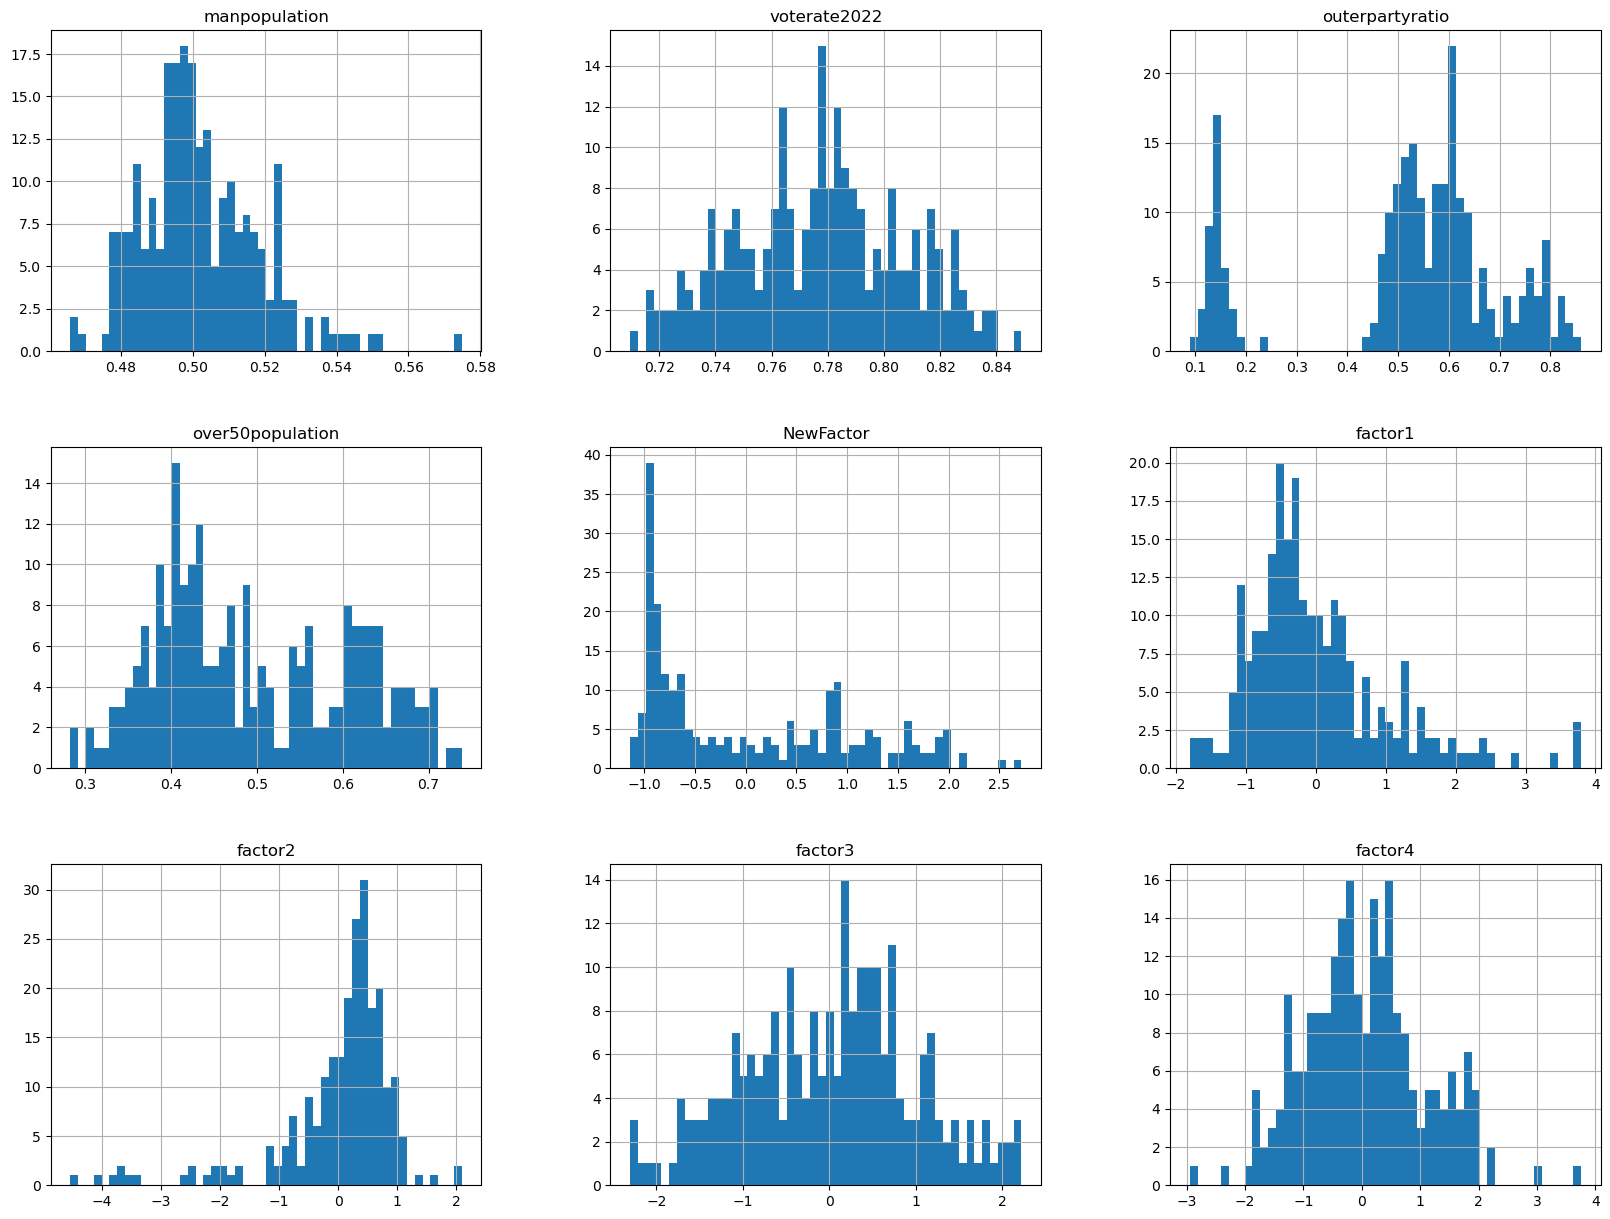

In [11]:
total_for_reg.hist(bins=50, figsize=(20,15))

In [12]:
total_for_reg.head()

,manpopulation,voterate2022,outerpartyratio,over50population,NewFactor,factor1,factor2,factor3,factor4
가평군,0.512024,0.764357,0.603225,0.566721,0.556088,1.570255,0.714038,-1.182049,1.287469
강릉시,0.500203,0.762683,0.612755,0.480245,-0.270361,-0.313803,-0.484991,0.204273,0.496674
강진군,0.485489,0.824524,0.146723,0.643763,1.510306,0.460763,0.087739,1.625572,1.066558
거제시,0.531861,0.749616,0.553038,0.360444,-0.579075,-0.887245,0.298740,-1.447908,1.792103
거창군,0.495138,0.780392,0.707828,0.567560,0.701705,-0.578207,0.492551,0.663532,0.408516


In [13]:
model1 = smf.ols('voterate2022 ~ factor1 + factor2 + factor3', data = total_for_reg).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     23.88
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.72e-13
Time:                        16:11:51   Log-Likelihood:                 521.08
No. Observations:                 234   AIC:                            -1034.
Df Residuals:                     230   BIC:                            -1020.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7771      0.002    451.394      0.0

In [14]:
model2 = smf.ols('voterate2022 ~ factor1 + factor2 + factor3 + manpopulation + outerpartyratio + over50population', data = total_for_reg).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     29.59
Date:                Thu, 18 May 2023   Prob (F-statistic):           4.30e-26
Time:                        16:11:51   Log-Likelihood:                 556.96
No. Observations:                 234   AIC:                            -1100.
Df Residuals:                     227   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0936      0.054  

In [15]:
model3 = smf.ols('voterate2022 ~ NewFactor', data = total_for_reg).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     57.13
Date:                Thu, 18 May 2023   Prob (F-statistic):           9.40e-13
Time:                        16:11:51   Log-Likelihood:                 515.11
No. Observations:                 234   AIC:                            -1026.
Df Residuals:                     232   BIC:                            -1019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7770      0.002    441.861      0.0

In [16]:
model4 = smf.ols('voterate2022 ~ NewFactor + manpopulation + outerpartyratio + over50population', data = total_for_reg).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     38.31
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.57e-24
Time:                        16:11:51   Log-Likelihood:                 549.30
No. Observations:                 234   AIC:                            -1089.
Df Residuals:                     229   BIC:                            -1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1874      0.066  

In [17]:
model6 = smf.ols('voterate2022 ~ factor1 + factor3 + manpopulation + outerpartyratio', data = total_for_reg).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     40.42
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.33e-25
Time:                        16:11:51   Log-Likelihood:                 551.85
No. Observations:                 234   AIC:                            -1094.
Df Residuals:                     229   BIC:                            -1076.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0631      0.053     

In [18]:
model7 = smf.ols('voterate2022 ~ factor1 + factor2 + manpopulation + outerpartyratio', data = total_for_reg).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     39.39
Date:                Thu, 18 May 2023   Prob (F-statistic):           4.42e-25
Time:                        16:11:51   Log-Likelihood:                 550.61
No. Observations:                 234   AIC:                            -1091.
Df Residuals:                     229   BIC:                            -1074.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1448      0.049     

In [19]:
model8 = smf.ols('voterate2022 ~ factor3 + factor2 + manpopulation + outerpartyratio', data = total_for_reg).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     18.31
Date:                Thu, 18 May 2023   Prob (F-statistic):           4.53e-13
Time:                        16:11:51   Log-Likelihood:                 521.83
No. Observations:                 234   AIC:                            -1034.
Df Residuals:                     229   BIC:                            -1016.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9268      0.057     

## 연령 효과 제거 모형

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
data_for_reg2_1 = pd.read_excel("minus_factors_new_2.xlsx", index_col= 0)
data_for_reg2_2 = pd.read_excel("factors_2.xlsx",index_col= 0)
data_for_reg2_1.columns = ['NewFactor']
data_for_control_2 = pd.read_excel("Re_t_new_merge.xlsx",index_col= 0)
data_for_reg2_1.index = data_for_control_2.index
data_for_reg2_2.index = data_for_control_2.index

In [22]:
data_for_control_2['남성_pop'] = data_for_control_2['남성_pop']/data_for_control_2['total_pop']

In [23]:
controal_va_2 = data_for_control_2[['남성_pop', '2022_투표율', '야당비율_2022','65_pop', '50_pop']]

In [24]:
np.isinf(data_for_control_2[['남성_pop', '2022_투표율','야당비율_2022', '65_pop', '50_pop']]).sum()

남성_pop       0
2022_투표율     0
야당비율_2022    0
65_pop       0
50_pop       0
dtype: int64

In [25]:
total_for_reg2 = pd.merge(controal_va_2, pd.merge(data_for_reg2_1, data_for_reg2_2, left_index=True, right_index=True),left_index=True, right_index=True)
total_for_reg2.head()

,남성_pop,2022_투표율,야당비율_2022,65_pop,50_pop,NewFactor,factor1,factor2
가평군,0.512024,0.764357,0.603225,15926,0.566721,-0.512212,-1.092492,-0.537080
강릉시,0.500203,0.762683,0.612755,46318,0.480245,0.268668,0.541219,0.862675
강진군,0.485489,0.824524,0.146723,11466,0.643763,-1.467974,-0.742917,-0.065006
거제시,0.531861,0.749616,0.553038,28126,0.360444,0.409352,0.521138,-0.447486
거창군,0.495138,0.780392,0.707828,16921,0.567560,-0.721472,0.306059,-0.547548


In [26]:
total_for_reg2 = total_for_reg2.rename(columns={'2022_투표율' : 'voterate2022', '남성_pop' :'manpopulation', '야당비율_2022' : 'outerpartyratio', '65_pop' : 'over65population',  '50_pop' : 'over50population'})

In [27]:
total_for_reg2 = total_for_reg2[total_for_reg2['voterate2022']!=0]

In [28]:
total_for_reg2 = total_for_reg2.drop(["NewFactor", "over65population"], axis=1)

In [29]:
pd.DataFrame(np.corrcoef(total_for_reg2.T), index= total_for_reg2.columns, columns=total_for_reg2.columns)

,manpopulation,voterate2022,outerpartyratio,over50population,factor1,factor2
manpopulation,1.000000,-0.216940,0.027960,0.009800,-0.303996,-0.079653
voterate2022,-0.216940,1.000000,-0.357668,0.383407,-0.407865,-0.104428
outerpartyratio,0.027960,-0.357668,1.000000,0.037183,0.053626,-0.100140
over50population,0.009800,0.383407,0.037183,1.000000,-0.632829,-0.330016
factor1,-0.303996,-0.407865,0.053626,-0.632829,1.000000,0.005973
factor2,-0.079653,-0.104428,-0.100140,-0.330016,0.005973,1.000000


array([[<AxesSubplot:title={'center':'manpopulation'}>,
        <AxesSubplot:title={'center':'voterate2022'}>],
       [<AxesSubplot:title={'center':'outerpartyratio'}>,
        <AxesSubplot:title={'center':'over50population'}>],
       [<AxesSubplot:title={'center':'factor1'}>,
        <AxesSubplot:title={'center':'factor2'}>]], dtype=object)

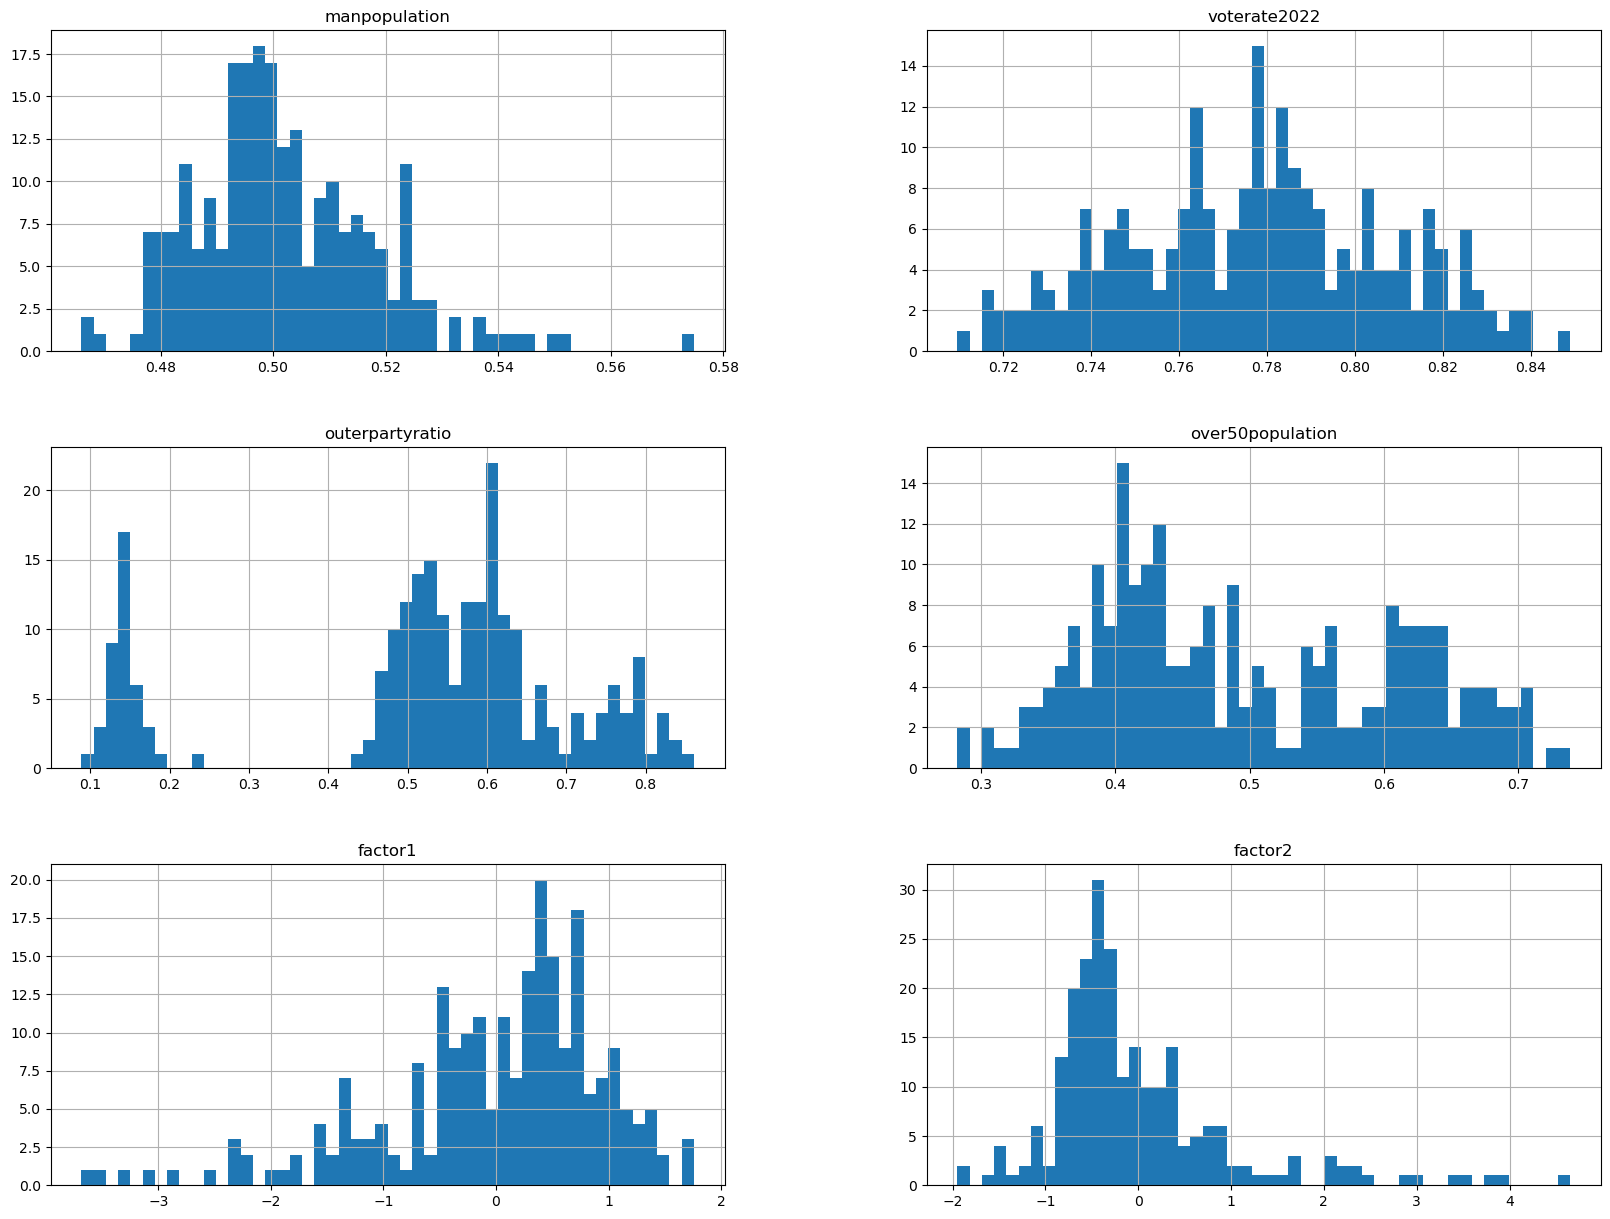

In [30]:
total_for_reg2.hist(bins=50, figsize=(20,15))

In [31]:
model2_1 = smf.ols('voterate2022 ~ factor1 + factor2', data = total_for_reg2).fit()
print(model2_1.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     24.80
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.75e-10
Time:                        16:11:54   Log-Likelihood:                 512.11
No. Observations:                 234   AIC:                            -1018.
Df Residuals:                     231   BIC:                            -1008.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7772      0.002    435.415      0.0

In [32]:
model2_2 = smf.ols('voterate2022 ~ factor1 + factor2 + manpopulation + outerpartyratio + over50population', data = total_for_reg2).fit()
print(model2_2.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     33.74
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.00e-25
Time:                        16:11:54   Log-Likelihood:                 554.15
No. Observations:                 234   AIC:                            -1096.
Df Residuals:                     228   BIC:                            -1076.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1267      0.055  

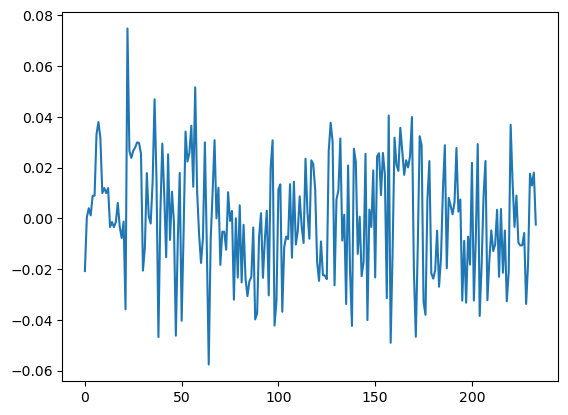

In [37]:
plt.plot(range(len(total_for_reg2.index)),model2_2.resid)

In [38]:
import statsmodels.stats.api as sms
test_result = sms.het_breuschpagan(model2_2.resid, model2_2.model.exog)

In [41]:
from statsmodels.compat import lzip

names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

pd.DataFrame(lzip(names, test_result))

,0,1
0,Lagrange multiplier statistic,17.264832
1,p-value,0.004024
2,f-value,3.632435
3,f p-value,0.003508


In [45]:
model2_2 = smf.ols('voterate2022 ~ factor1 + factor2 + manpopulation + outerpartyratio + over50population', data = total_for_reg2).fit(cov_type='HC3')
print(model2_2.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     51.44
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.48e-35
Time:                        16:27:44   Log-Likelihood:                 554.15
No. Observations:                 234   AIC:                            -1096.
Df Residuals:                     228   BIC:                            -1076.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1267      0.056  

In [33]:
model2_2_3 = smf.ols('voterate2022 ~ factor1 + factor2 + manpopulation + outerpartyratio', data = total_for_reg2).fit()
print(model2_2_3.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     42.07
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.00e-26
Time:                        16:11:54   Log-Likelihood:                 553.81
No. Observations:                 234   AIC:                            -1098.
Df Residuals:                     229   BIC:                            -1080.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1479      0.049     

In [ ]:
model2_5 = smf.ols('voterate2022 ~ factor1 + manpopulation + outerpartyratio + over50population', data = total_for_reg2).fit()
print(model2_5.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     39.62
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.36e-25
Time:                        21:44:08   Log-Likelihood:                 550.89
No. Observations:                 234   AIC:                            -1092.
Df Residuals:                     229   BIC:                            -1075.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0876      0.054  

In [ ]:
model2_6 = smf.ols('voterate2022 ~ factor2 + over50population + manpopulation + outerpartyratio', data = total_for_reg2).fit()
print(model2_6.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     28.28
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.26e-19
Time:                        20:44:55   Log-Likelihood:                 536.32
No. Observations:                 234   AIC:                            -1063.
Df Residuals:                     229   BIC:                            -1045.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9506      0.051  

In [ ]:
model2_7 = smf.ols('voterate2022 ~ over50population + manpopulation + outerpartyratio', data = total_for_reg2).fit()
print(model2_7.summary())

                            OLS Regression Results                            
Dep. Variable:           voterate2022   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     37.73
Date:                Mon, 15 May 2023   Prob (F-statistic):           7.21e-20
Time:                        21:44:12   Log-Likelihood:                 536.18
No. Observations:                 234   AIC:                            -1064.
Df Residuals:                     230   BIC:                            -1051.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9471      0.050  